# 上机实验11：核化分类器判定西瓜好坏

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
data = pd.read_csv("work/西瓜数据集3.0α.txt")
data

,Density,Sugar content,Good melon
0,0.697,0.460,是
1,0.774,0.376,是
2,0.634,0.264,是
3,0.608,0.318,是
4,0.556,0.215,是
5,0.403,0.237,是
6,0.481,0.149,是
7,0.437,0.211,是
8,0.666,0.091,否
9,0.243,0.267,否


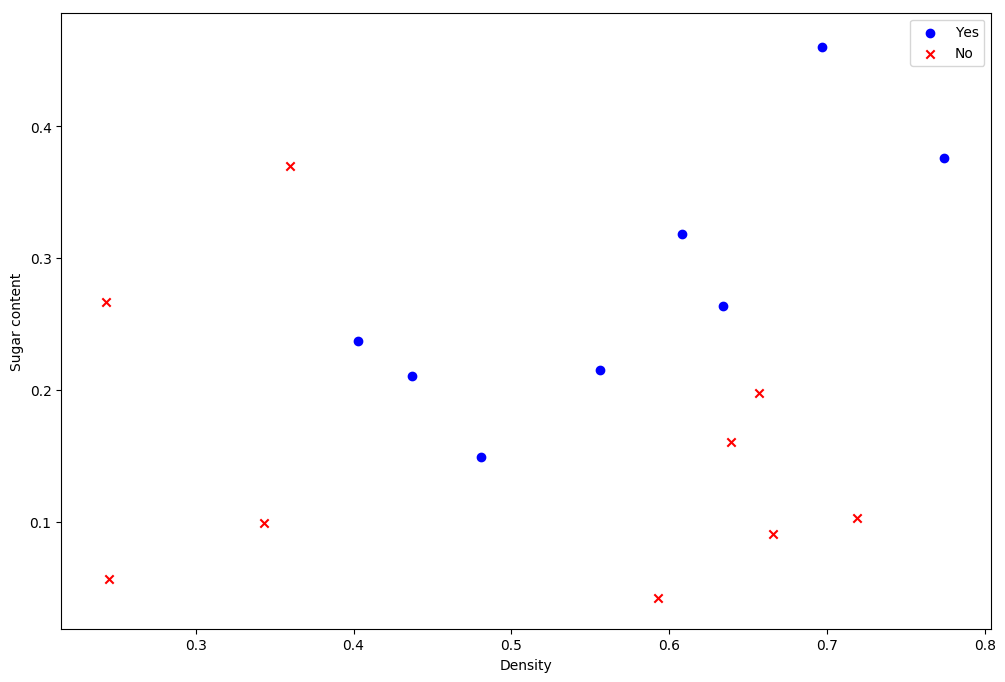

In [28]:
yes = data[data['Good melon'].isin(['是'])]
no = data[data['Good melon'].isin(['否'])]
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(yes['Density'], yes['Sugar content'], marker='o', c='b', label='Yes')
ax.scatter(no['Density'], no['Sugar content'], marker='x', c='r', label='No')
ax.legend()
ax.set_xlabel('Density')
ax.set_ylabel('Sugar content')
plt.show() # 可以发现线性不可分

## 任务1：SVM分类器判定西瓜好坏

在SVM分类器中，使用线性核与高斯核进行比较。

In [29]:
from sklearn import svm

# 使用线性核与高斯核进行比较
linear_svc = svm.SVC(kernel='linear')
rbf_svc = svm.SVC(kernel='rbf')

In [30]:
temp = {'是': 1, '否': -1}
X = np.array(data.iloc[:, :2])
y = np.array(data.iloc[:, 2].replace(temp))[None].T

In [31]:
linear_svc.fit(X, y)
linear_svc.score(X,y)
# 查看支持向量
linear_svc.support_vectors_

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[0.666, 0.091],
       [0.243, 0.267],
       [0.343, 0.099],
       [0.639, 0.161],
       [0.657, 0.198],
       [0.36 , 0.37 ],
       [0.593, 0.042],
       [0.719, 0.103],
       [0.697, 0.46 ],
       [0.774, 0.376],
       [0.634, 0.264],
       [0.608, 0.318],
       [0.556, 0.215],
       [0.403, 0.237],
       [0.481, 0.149],
       [0.437, 0.211]])

In [32]:
rbf_svc.fit(X, y)
rbf_svc.score(X,y)
# 查看支持向量
rbf_svc.support_vectors_

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[0.666, 0.091],
       [0.243, 0.267],
       [0.245, 0.057],
       [0.343, 0.099],
       [0.639, 0.161],
       [0.657, 0.198],
       [0.36 , 0.37 ],
       [0.593, 0.042],
       [0.719, 0.103],
       [0.697, 0.46 ],
       [0.774, 0.376],
       [0.634, 0.264],
       [0.608, 0.318],
       [0.556, 0.215],
       [0.403, 0.237],
       [0.481, 0.149],
       [0.437, 0.211]])

## 任务2：Kernel Logistic Regression 判定西瓜好坏

将原始的Logistic Regression 进行核化，使用不同的核函数进行比较。

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/ipykernel_launcher.py:87: RuntimeWarning: overflow encountered in exp


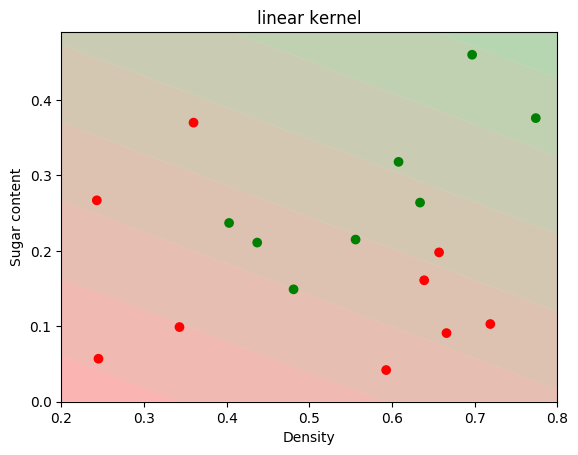

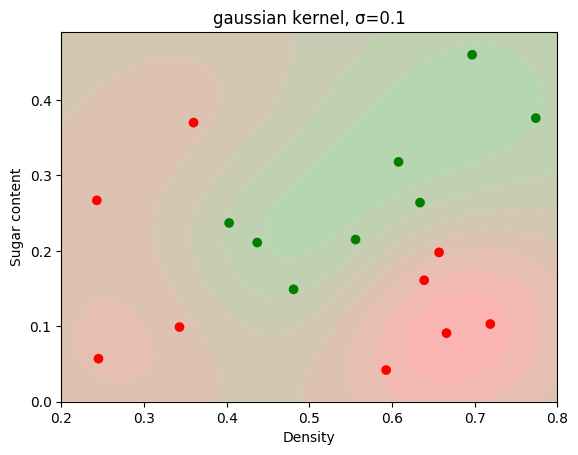

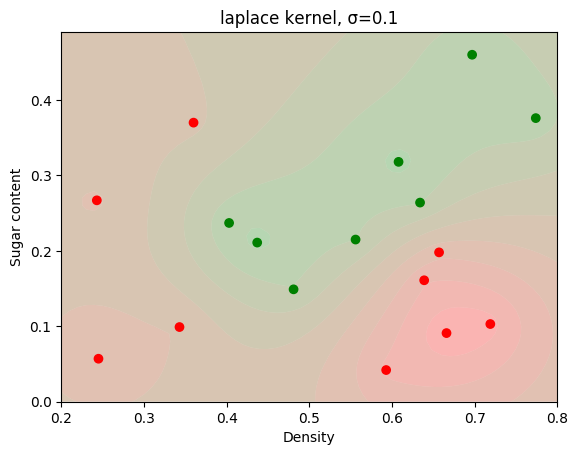

In [33]:

import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


class LogisticRegression:
    kern_param = 0
    X = np.array([])
    a = np.array([])
    kernel = None

    def __init__(self, kernel='poly', kern_param=None):
        if kernel == 'poly':
            self.kernel = self.__linear__
            if kern_param:
                self.kern_param = kern_param
            else:
                self.kern_param = 1
        elif kernel == 'gaussian':
            self.kernel = self.__gaussian__
            if kern_param:
                self.kern_param = kern_param
            else:
                self.kern_param = 0.1
        elif kernel == 'laplace':
            self.kernel = self.__laplace__
            if kern_param:
                self.kern_param = kern_param
            else:
                self.kern_param = 0.1

    def fit(self, X, y, max_rate=100, min_rate=0.001, gd_step=10, epsilon=0.0001):
        m = len(X)
        self.X = np.vstack([X.T, np.ones(m)]).T
        # Construct kernel matrix
        K = self.kernel(self.X,self.X,self.kern_param)########
        # Gradient descent
        self.a = np.zeros([m])
        prev_cost = 0
        next_cost = self.__cost__(K, y, self.a)
        while np.fabs(prev_cost-next_cost) > epsilon:
            neg_grad = -self.__gradient__(K, y, self.a)
            best_rate = rate = max_rate
            min_cost = self.__cost__(K, y, self.a)
            while rate >= min_rate:
                cost = self.__cost__(K, y, self.a+neg_grad*rate)
                if cost < min_cost:
                    min_cost = cost
                    best_rate = rate
                rate /= gd_step
            self.a += neg_grad * best_rate
            prev_cost = next_cost
            next_cost = min_cost

    def predict(self, X):
        X = np.vstack([np.transpose(X), np.ones([len(X)])]).T #(3050,3)
        return np.dot(self.a,self.kernel(X,self.X,self.kern_param).T)##########

    # Kernels
    @staticmethod
    def __linear__(a, b, parameter):
        return np.dot(a, np.transpose(b))

    @staticmethod
    def __gaussian__(a, b, kern_param):
        mat = np.zeros([len(a), len(b)])
        for i in range(0, len(a)):
            for j in range(0, len(b)):
                mat[i][j] = np.exp(-np.sum(np.square(np.subtract(a[i], b[j]))) / (2 * kern_param * kern_param))
        return mat

    @staticmethod
    def __laplace__(a, b, kern_param):
        mat = np.zeros([len(a), len(b)])
        for i in range(0, len(a)):
            for j in range(0, len(b)):
                mat[i][j] = np.exp(-np.linalg.norm(np.subtract(a[i], b[j])) / kern_param)
        return mat

    @staticmethod
    def __sigmoid__(X):
        return np.exp(X) / (1 + np.exp(X))

    @staticmethod
    def __cost__(K, y, a):
        return -np.dot(y, np.dot(a, K)) + np.sum(np.log(1 + np.exp(np.dot(a, K))))

    @classmethod
    def __gradient__(cls, K, y, a):
        return -np.dot(K, y - cls.__sigmoid__(np.dot(a, K)))


# Read data
data = pd.read_csv("work/西瓜数据集3.0α.txt")
X = np.array(data[['Density', 'Sugar content']])
y = np.array(data['Good melon']) == '是'

# Kernels
kernels = ['poly', 'gaussian', 'laplace']
titles = ['linear kernel', 'gaussian kernel, σ=0.1', 'laplace kernel, σ=0.1']

for i in range(0, len(kernels)):
    # Training
    model = LogisticRegression(kernel=kernels[i])#######
    model.fit(X,y)
    
    # Plot
    cmap = colors.LinearSegmentedColormap.from_list('watermelon', ['red', 'green'])
    xx, yy = np.meshgrid(np.arange(0.2, 0.8, 0.01), np.arange(0.0, 0.5, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3, antialiased=True)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)
    plt.xlabel('Density')
    plt.ylabel('Sugar content')
    plt.title(titles[i])
    plt.show()